In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

## Loading and Transforming the Data

In [2]:
raw_csv_data = pd.read_csv('Index2018.csv')
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

## Remove Surplus Data

In [3]:
df_comp['market_value'] = df_comp.spx

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_teste = df_comp.iloc[:size], df_comp.iloc[size:]

## White noise

In [5]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))
df['wn'] = wn

<ipython-input-5-dfff303a6728>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [6]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1091.529284
std,292.559287,297.590158
min,438.920000,104.647417
25%,914.620000,891.673050
50%,1144.650000,1088.535240
75%,1316.280729,1290.631297
max,1570.252238,2272.613755


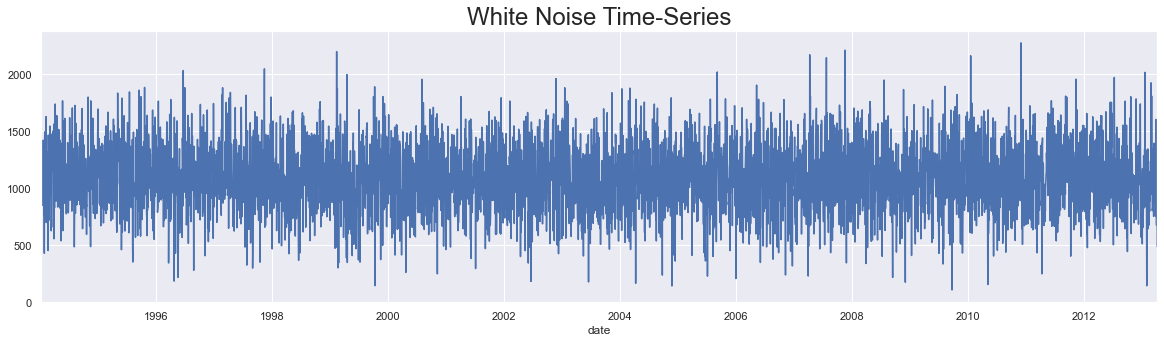

In [9]:
df.wn.plot(figsize=(20,5))
plt.title('White Noise Time-Series', size=24)
plt.show()

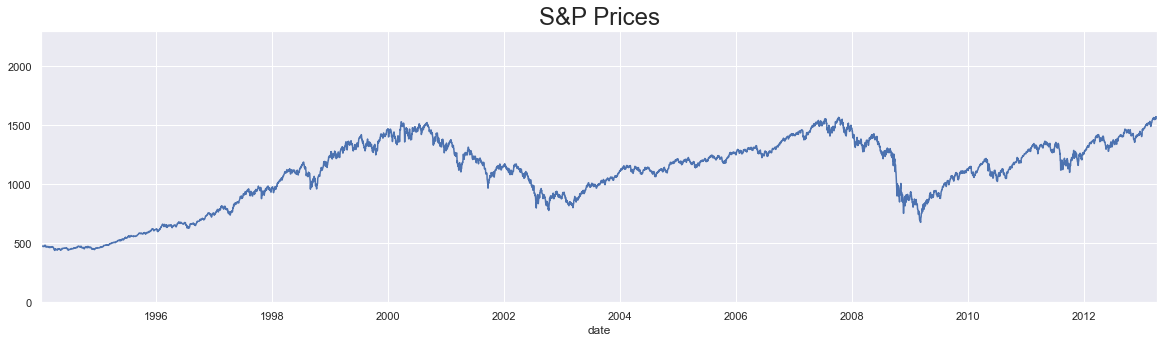

In [11]:
df.market_value.plot(figsize=(20,5))
plt.title('S&P Prices', size=24)
plt.ylim(0,2300)
plt.show()

## Random Walk

In [13]:
rw = pd.read_csv('Randwalk.csv')
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index('date', inplace=True)
rw = rw.asfreq('b')

In [14]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [15]:
df['rw'] = rw.price

<ipython-input-15-ef067d009833>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


In [16]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1543.891637,1122.139662
1994-01-10,475.27,1239.233371,1080.347860
1994-01-11,474.13,854.277899,1082.095245
1994-01-12,474.17,1120.231453,1083.639265
1994-01-13,472.47,1330.574554,1067.146255


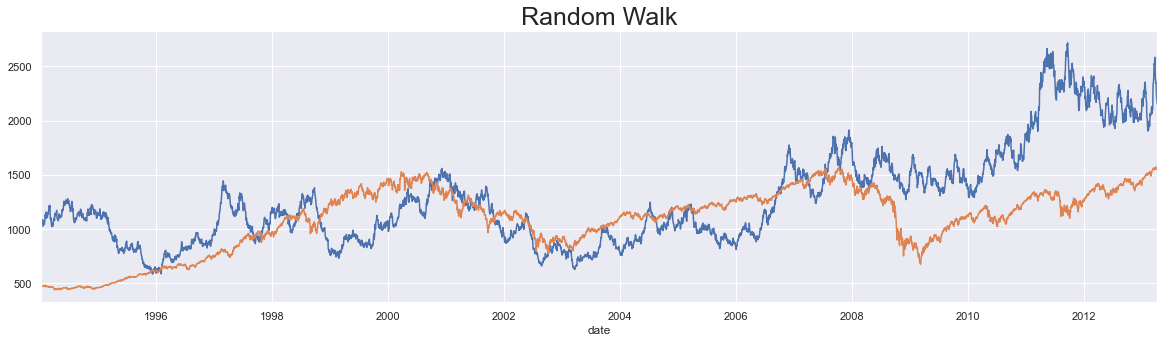

In [18]:
df.rw.plot(figsize=(20,5))
df.market_value.plot()
plt.title('Random Walk', size=25)
plt.show()

## Stationarity

In [19]:
sts.adfuller(df.market_value)

(-1.736984745235242,
 0.41216456967706294,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [20]:
sts.adfuller(df.wn)

(-70.08674454285382,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70977.11782171874)

In [21]:
sts.adfuller(df.rw)

(-1.3286073927689699,
 0.6159849181617394,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)